In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
np.set_printoptions(suppress=True)

In [3]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [4]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [5]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [6]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [7]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [8]:
df_m = pd.merge(df_customers, df_loans, on="cust_id")
df_m.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [9]:
df = pd.merge(df_m, df_bureau, on="cust_id")
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
# converting the bool to int
df['default'] = df['default'].astype(int)
df['default'].value_counts()

,count
default,
0,45703
1,4297


In [12]:
# Data leakage by train test data leakage or Target leakage
# Whenever training a dataset it should not be influenced by testing dataset. It will cause train test data leakage
# Split the dataset at the beginning. So, train data not influenced by test data in feature engineering.

X = df.drop("default", axis="columns")
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0


## **Data Cleaning**

In [13]:
df_train.isna().sum()

,0
cust_id,0
age,0
gender,0
marital_status,0
employment_status,0
income,0
number_of_dependants,0
residence_type,47
years_at_current_address,0
city,0


In [14]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [15]:
# finding the most occuring value to fill nan
mode_residence = df_train['residence_type'].mode()[0]
mode_residence

'Owned'

In [16]:
# fill nan values in train dataset
df_train['residence_type'].fillna(mode_residence, inplace=True)
df_train['residence_type'].unique()

<ipython-input-16-5843ea00da60>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
# fill nan values in test dataset
df_test['residence_type'].fillna(mode_residence, inplace=True)
df_test['residence_type'].unique()

<ipython-input-17-9a94a8ee565f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [18]:
# check for duplicates
df_train.duplicated().sum()

np.int64(0)

In [19]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [20]:
columns_countinous = ['age', 'income', 'number_of_dependants', 'years_at_current_address'
, 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement'
, 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application'
, 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months'
, 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
# , 'disbursal_date', 'installment_start_dt'

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type'
, 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

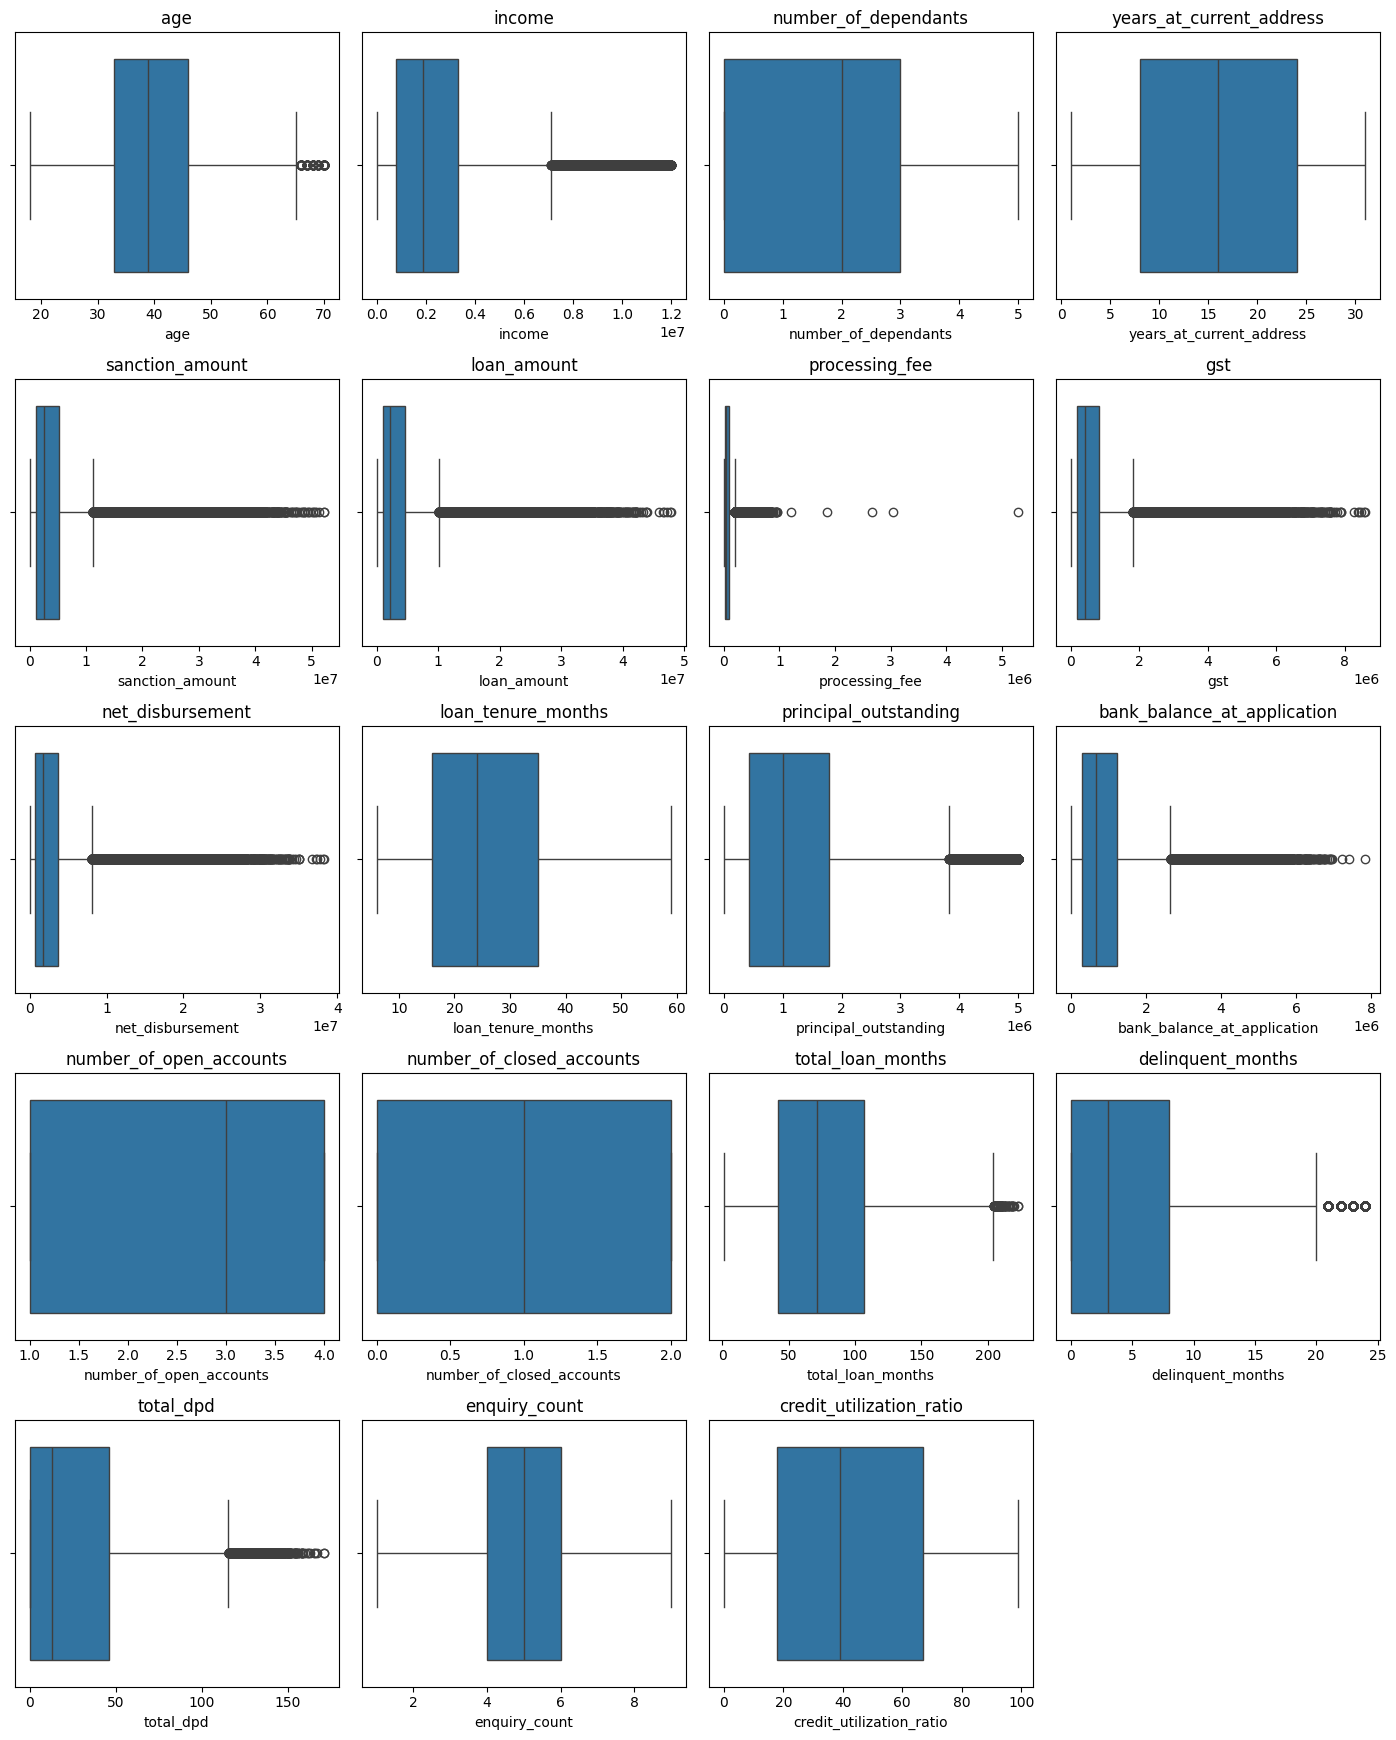

In [21]:
# Filter only numeric columns (exclude dates or IDs if needed)
boxplot_cols = [col for col in columns_countinous if df_train[col].dtype != 'O' and not pd.api.types.is_datetime64_any_dtype(df_train[col])]

# Grid size: 4 plots per row
cols_per_row = 4
n_cols = cols_per_row
n_rows = -(-len(boxplot_cols) // cols_per_row)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3.5 * n_cols, 3.5 * n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(boxplot_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

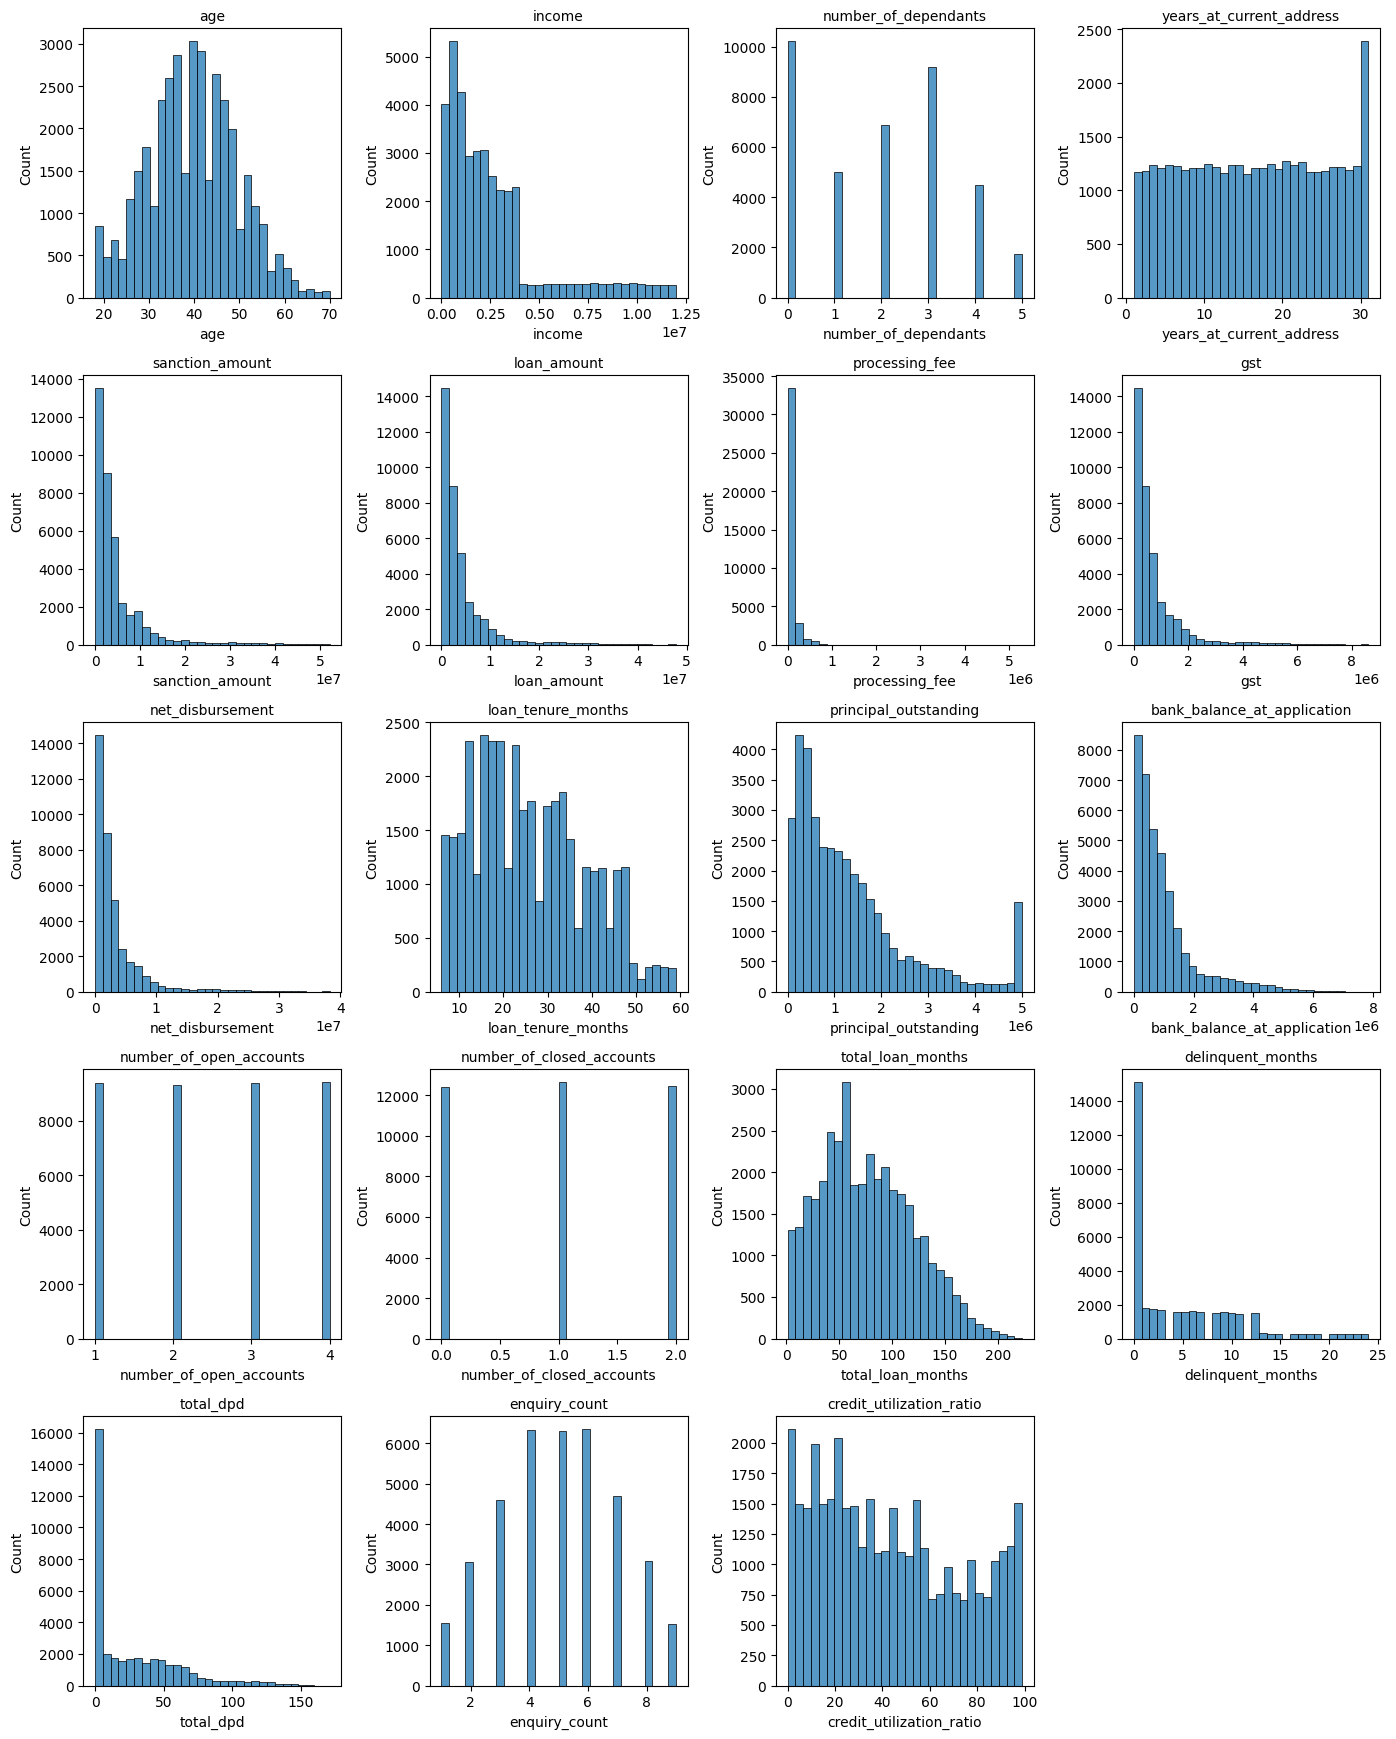

In [22]:
# Use the same filtered numeric columns
hist_cols = [col for col in columns_countinous if df_train[col].dtype != 'O' and not pd.api.types.is_datetime64_any_dtype(df_train[col])]

cols_per_row = 4
n_cols = cols_per_row
n_rows = -(-len(hist_cols) // cols_per_row)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3.5 * n_cols, 3.5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(hist_cols):
    sns.histplot(df_train[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(col, fontsize=10)

# Hide extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [23]:
# we can see some processing fee as higher as loan amount in histogram
# business input: processing fee is 3% of loan amount
df_train[(df_train['processing_fee'] / df_train['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.023
28174,966000,1214492.673
47089,1738000,1858964.768
29305,2616000,3036378.005
9898,3626000,5293543.524


In [24]:
# Removing from train data
df_train_1 = df_train[(df_train['processing_fee'] / df_train['loan_amount']) < 0.03].copy()
df_train_1[(df_train_1['processing_fee'] / df_train_1['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [25]:
# Removing from test data
df_test = df_test[(df_test['processing_fee'] / df_test['loan_amount']) < 0.03].copy()
df_test[(df_test['processing_fee'] / df_test['loan_amount']) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [26]:
# values in categorical columns
for col in columns_categorical:
    print(f"{col} --> {df_train_1[col].unique()}")

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [27]:
# correcting the spelling in loan purpose
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')

## **Exploratory Data Analysis**

In [28]:
# column names
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

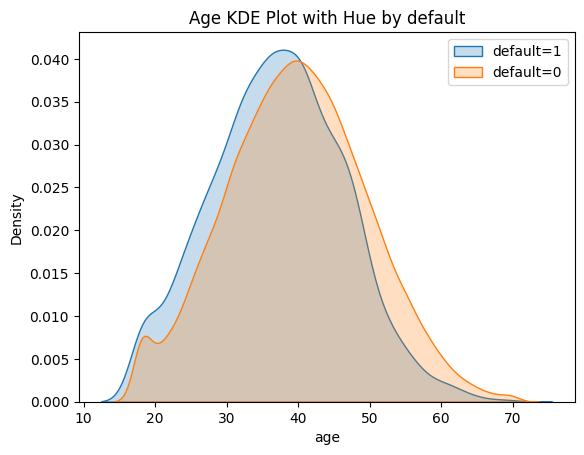

In [29]:
sns.kdeplot(data=df_train_1[df_train_1['default']==1], x='age', fill=True, label="default=1")
sns.kdeplot(data=df_train_1[df_train_1['default']==0], x='age', fill=True, label="default=0")
plt.title("Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insight**: Young people are more likely to default

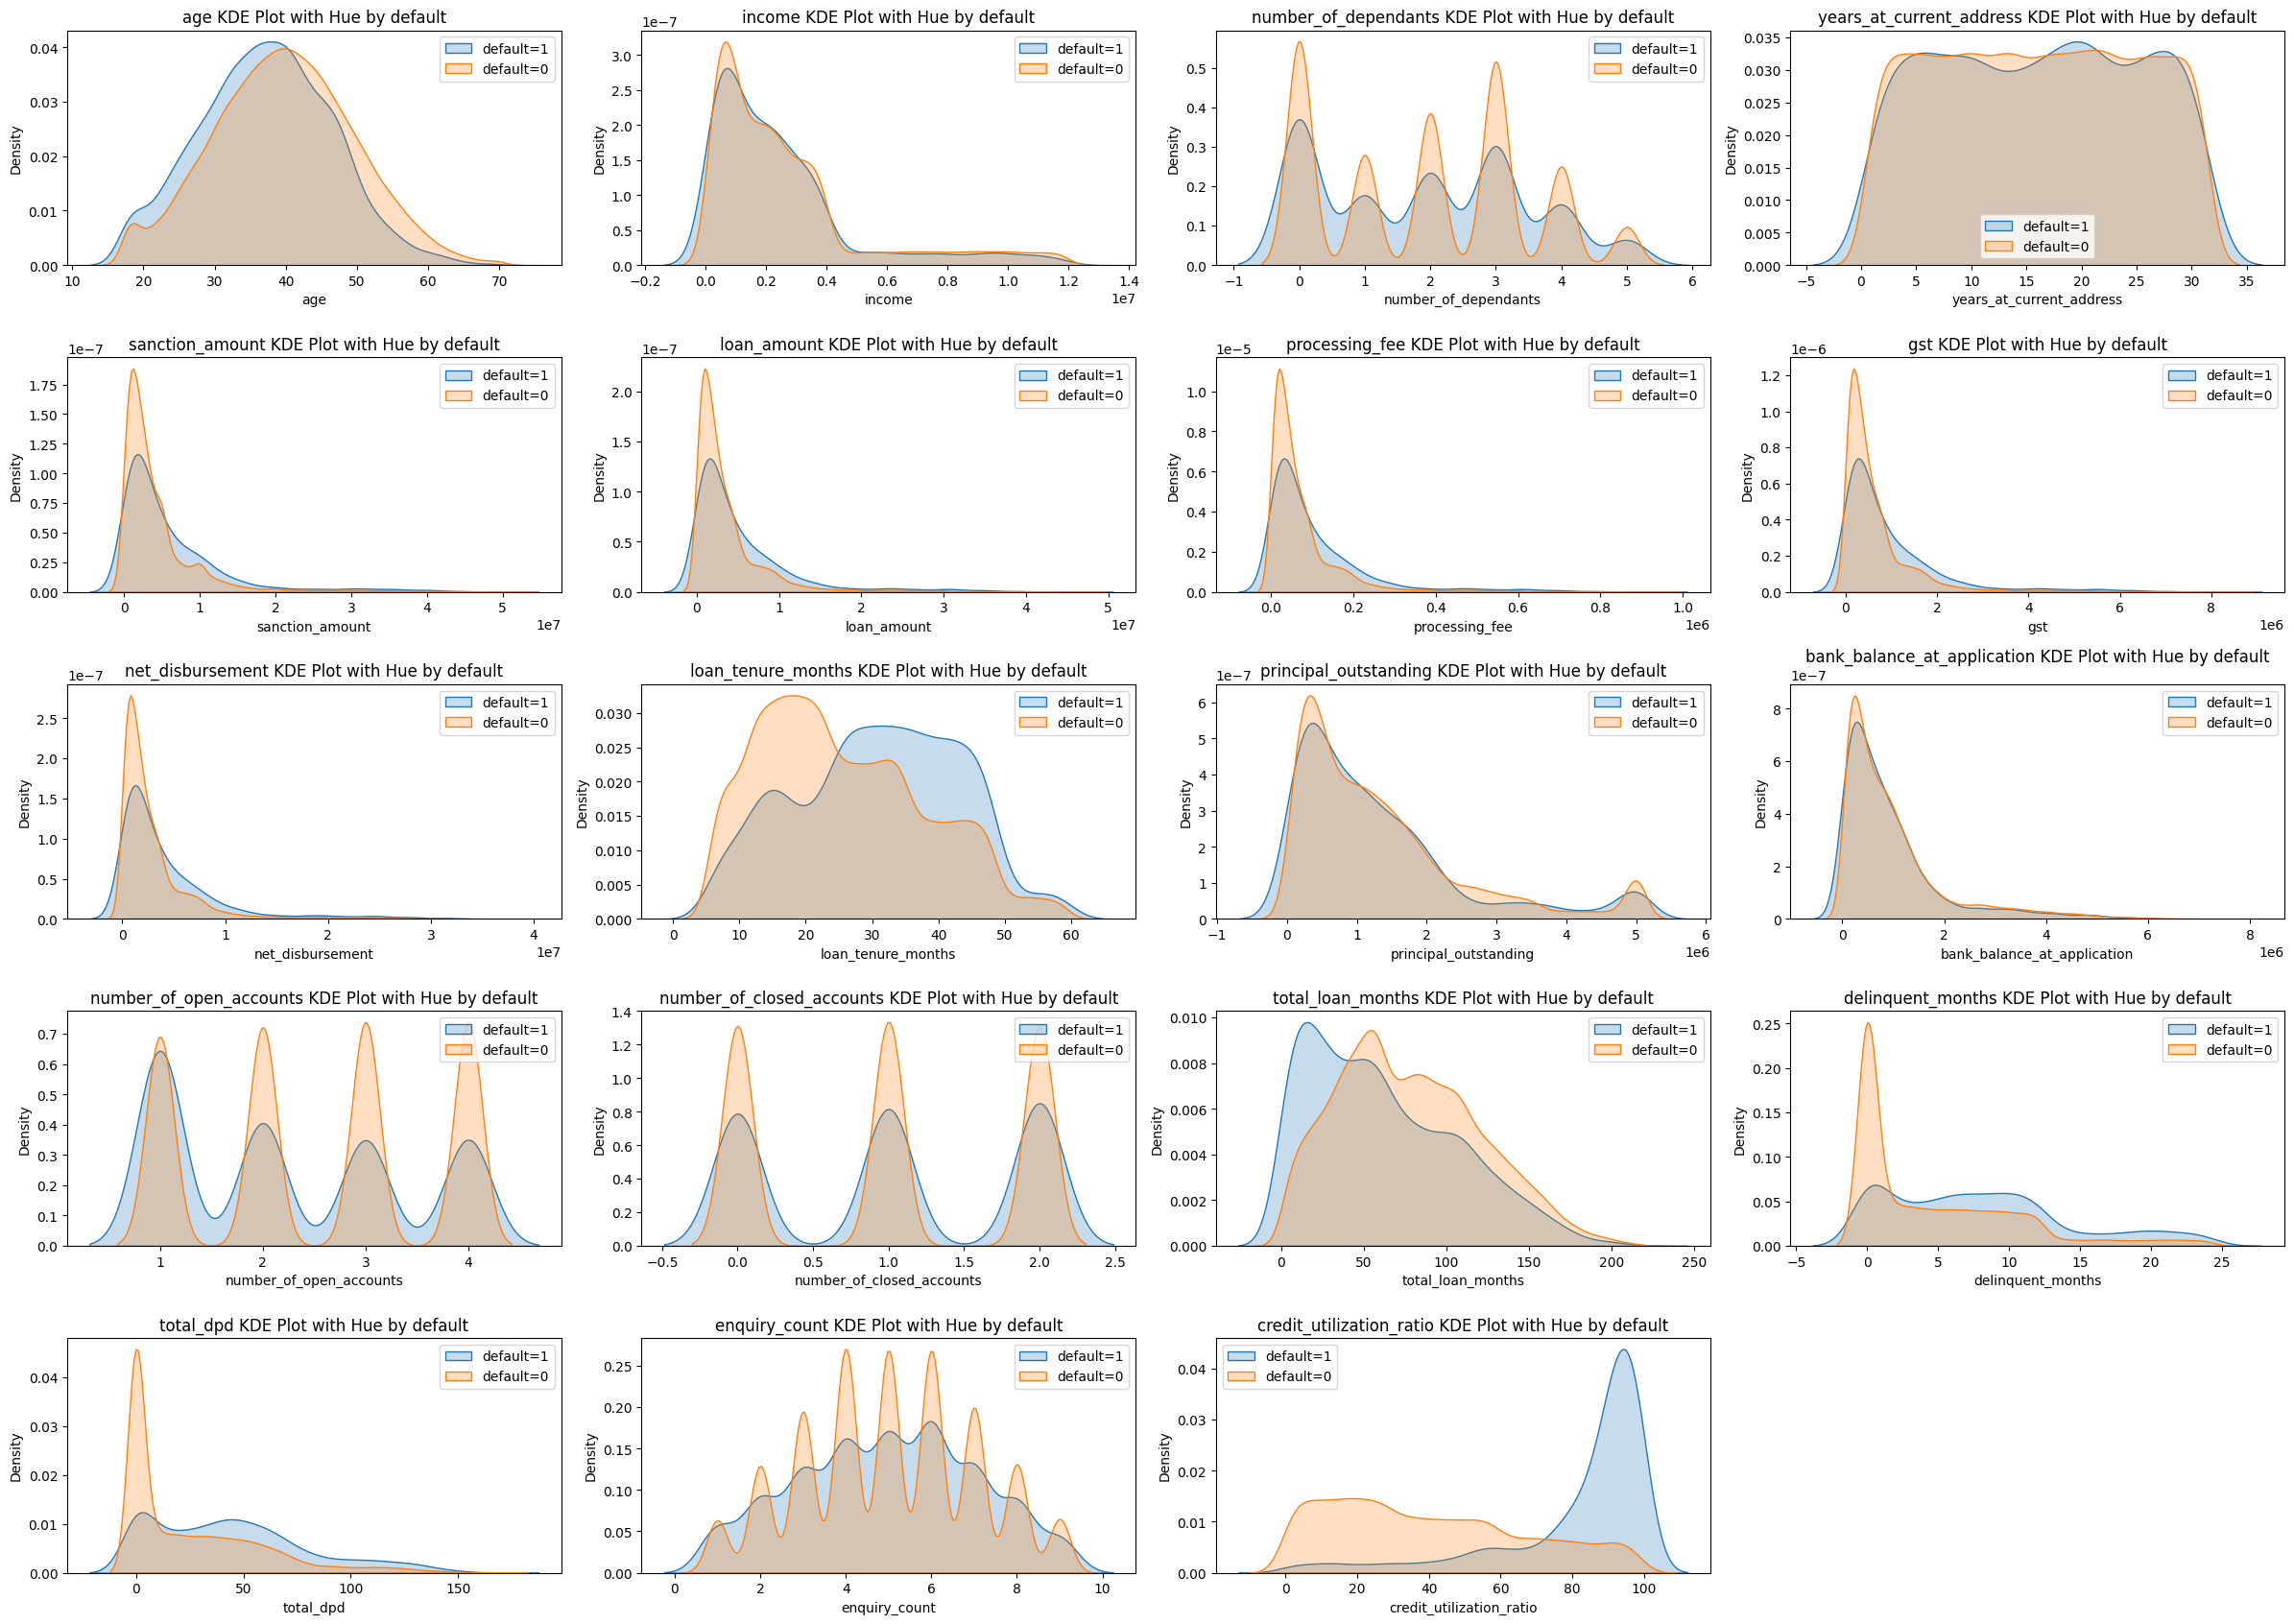

In [30]:
plt.figure(figsize=(24, 20))  # width height in inches

for i, col in enumerate(columns_countinous):
  plt.subplot(6, 4, i+1) # 1 row, 4 columns, ith subplot
  sns.kdeplot(data=df_train_1[df_train_1['default']==1], x=col, fill=True, label="default=1")
  sns.kdeplot(data=df_train_1[df_train_1['default']==0], x=col, fill=True, label="default=0")
  plt.title(f"{col} KDE Plot with Hue by default")
  plt.legend()

plt.tight_layout()
plt.show()

**Insights**:
* A higher credit utilization ratio is associated with a higher default rate.
* Shorter loan tenure is linked to lower defaults, while longer tenures show higher default rates.

## **Feature Engineering**

### **Loan to Income ratio**

In [31]:
# loan to income ratio is better than looking into a loan amount
df_train_1["loan_to_income"] = df_train_1["loan_amount"] / df_train_1["income"]
df_test["loan_to_income"] = df_test["loan_amount"] / df_test["income"]

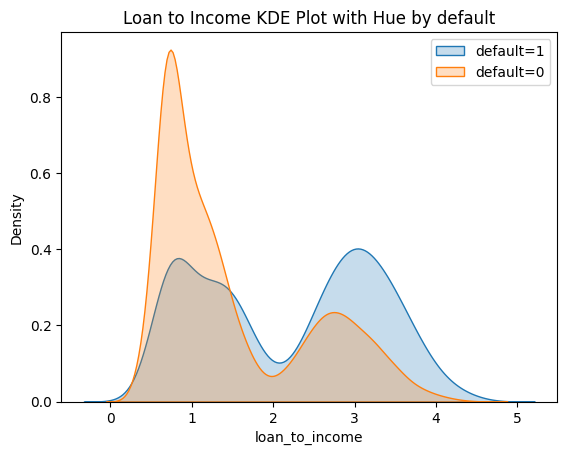

In [32]:
sns.kdeplot(data=df_train_1[df_train_1['default']==1], x='loan_to_income', fill=True, label="default=1")
sns.kdeplot(data=df_train_1[df_train_1['default']==0], x='loan_to_income', fill=True, label="default=0")
plt.title("Loan to Income KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insight**: Borrowers with a loan-to-income ratio less than 1 tend to have higher loan repayment rates, whereas a ratio above 2 is associated with an increased default rate.

### **Deliquent months to loan months ratio**

In [33]:
df_train_1['deliquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['deliquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

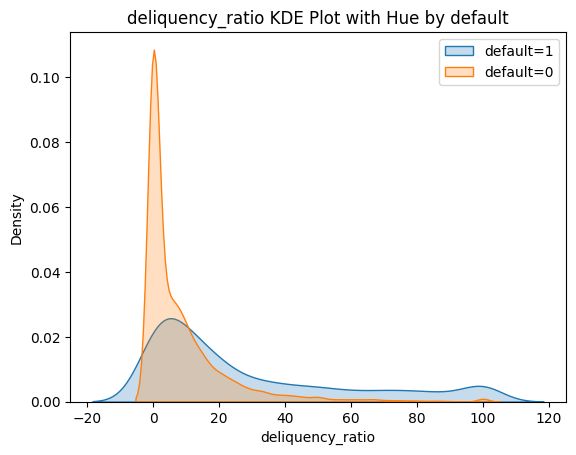

In [34]:
sns.kdeplot(data=df_train_1[df_train_1['default']==1], x='deliquency_ratio', fill=True, label="default=1")
sns.kdeplot(data=df_train_1[df_train_1['default']==0], x='deliquency_ratio', fill=True, label="default=0")
plt.title("deliquency_ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insight**: Higher delinquency ratios are associated with an increased likelihood of default.

### **Average DPD per Deliquency**

In [35]:
# Logic to handle deliquent month value is 0
df_train_1['avg_dpd_per_deliquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_deliquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

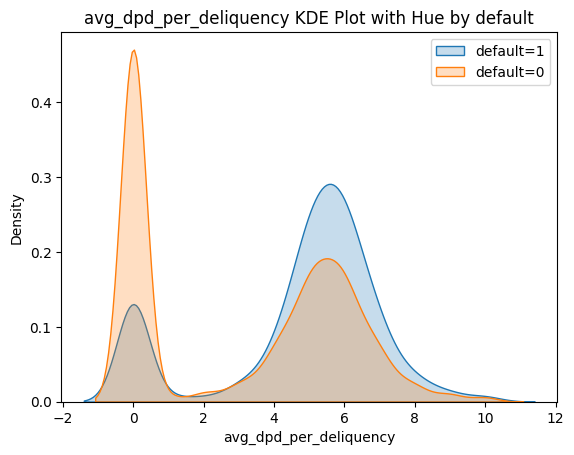

In [36]:
sns.kdeplot(data=df_train_1[df_train_1['default']==1], x='avg_dpd_per_deliquency', fill=True, label="default=1")
sns.kdeplot(data=df_train_1[df_train_1['default']==0], x='avg_dpd_per_deliquency', fill=True, label="default=0")
plt.title("avg_dpd_per_deliquency KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insight**: Higher average DPD (days past due) per delinquency is associated with a greater likelihood of default.

### **Feature Selection**

In [37]:
df_train_2 = df_train_1.drop(["cust_id", "loan_id"], axis="columns")
df_test = df_test.drop(["cust_id", "loan_id"], axis="columns")

In [38]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

In [39]:
df_train_3.select_dtypes(include=['float64', 'int64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'deliquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [40]:
X_train = df_train_3.drop("default", axis="columns")
y_train = df_train_3["default"]

X_test = df_test.drop("default", axis="columns")
y_test = df_test["default"]

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])


In [41]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.414,0.389,0.500,0.524,0.089,0.083,0.083,0.083,0.377,0.262,0.124,0.501,0.501,0.501,0.439,0.295,0.103,0.328
std,0.190,0.307,0.297,0.286,0.120,0.112,0.112,0.112,0.235,0.244,0.133,0.373,0.407,0.254,0.297,0.228,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.325,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.404,0.400,0.500,0.492,0.049,0.046,0.046,0.046,0.340,0.194,0.083,0.667,0.500,0.500,0.394,0.202,0.037,0.430
75%,0.538,0.600,0.767,0.763,0.098,0.096,0.096,0.096,0.547,0.352,0.155,1.000,1.000,0.625,0.677,0.507,0.129,0.573
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### **VIF**

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df = pd.DataFrame()
  vif_df["column"] = data.columns
  vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  return vif_df

In [43]:
calculate_vif(X_train[cols_to_scale])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,age,5.701
1,number_of_dependants,2.730
2,years_at_current_address,3.423
3,zipcode,3.798
4,sanction_amount,101.087
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.181
9,principal_outstanding,16.326


The VIF analysis reveals high multicollinearity, particularly with `sanction_amount`, `net_disbursement`, and `processing_fee`, which may distort model performance. These features are closely associated with the loan amount.


In [44]:
# Remove the features with high multicollinearity
features_to_drop_vif = ['sanction_amount', 'net_disbursement', 'processing_fee']
X_train = X_train.drop(features_to_drop_vif, axis='columns')
X_test = X_test.drop(features_to_drop_vif, axis='columns')

In [45]:
# Caluculating VIF after droping columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
vif_df = calculate_vif(X_train[numeric_columns])
vif_df

,column,VIF
0,age,5.688
1,number_of_dependants,2.730
2,years_at_current_address,3.423
3,zipcode,3.798
4,gst,6.847
5,loan_tenure_months,6.105
6,principal_outstanding,16.255
7,bank_balance_at_application,9.341
8,number_of_open_accounts,4.386
9,number_of_closed_accounts,2.385


In [46]:
selected_numeric_features_vif = vif_df.column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'gst', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'], dtype=object)

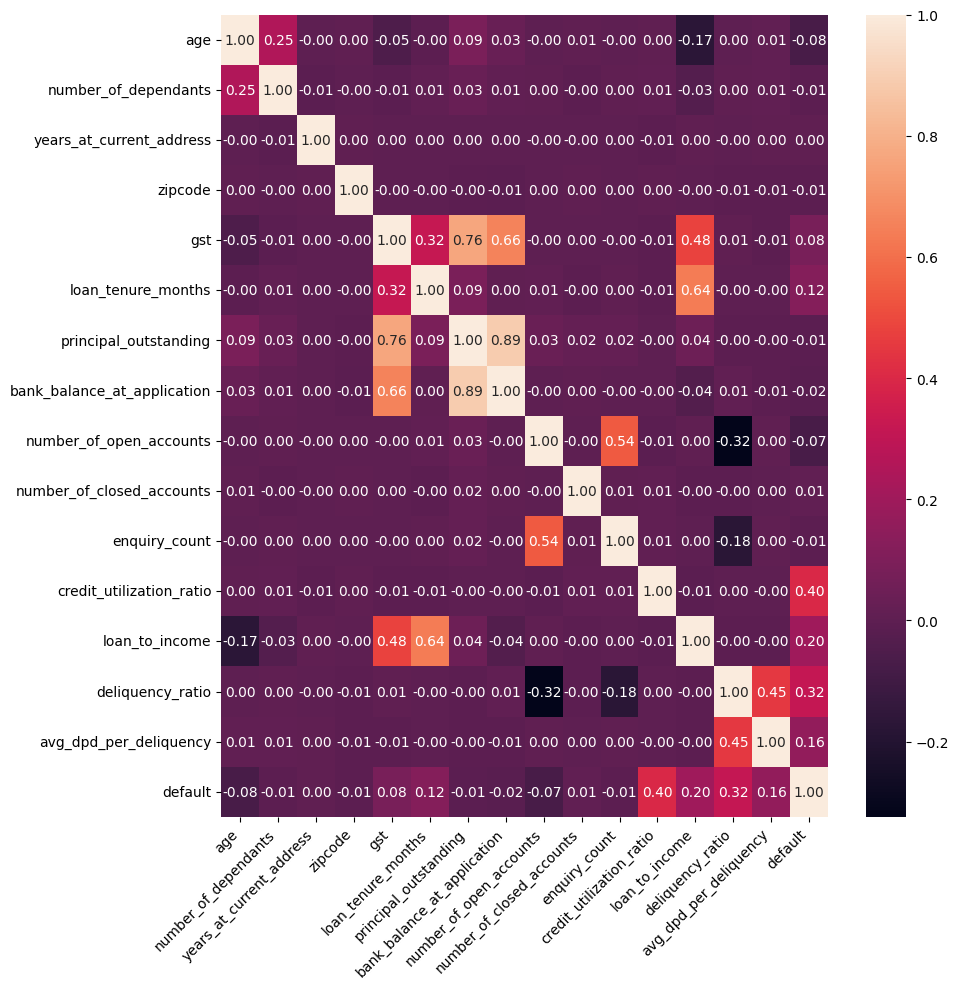

In [47]:
# correlation matrix
plt.figure(figsize=(10, 10))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Weight of Evidence (WOE), Information Value (IV)**

* Weight of Evidence (WOE) is a variable transformation technique that converts categorical independent variables into numerical values, enhancing their predictive power in modeling.
* Information Value (IV) is a measure that quantifies the predictive strength of an independent variable, helping to determine its overall impact on the target variable. (primarly categorical feature)

In [48]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [49]:
# function to calculate WOE and IV
def calculate_woe_iv(df, feature, target):
  grouped = df.groupby(feature)[target].agg(['count', 'sum'])
  grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
  grouped['bad'] = grouped['total'] - grouped['good']

  total_good = grouped['good'].sum()
  total_bad = grouped['bad'].sum()

  grouped['good_pct'] = grouped['good'] / total_good
  grouped['bad_pct'] = grouped['bad'] / total_bad
  grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
  grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']

  grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
  grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

  total_iv = grouped['iv'].sum()

  return grouped, total_iv

In [50]:
grouped, total_iv = calculate_woe_iv(pd.concat([X_train, y_train], axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101,0.208,-0.717,0.076
Education,5620,559,5061,0.173,0.148,0.161,0.004
Home,11304,1734,9570,0.538,0.279,0.656,0.170
Personal,13117,603,12514,0.187,0.365,-0.669,0.119


In [51]:
# finding IV for features
iv_values = {}

for feature in X_train.columns:
  if X_train[feature].dtype == 'object':
    _, iv = calculate_woe_iv(pd.concat([X_train, y_train], axis=1), feature, 'default')
  else:
    X_binned = pd.cut(X_train[feature], bins=10, labels=False)
    _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')

  iv_values[feature] = iv

iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'gst': np.float64(0.09972462667256993),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'principal_outstanding': np.float64(0.02404188642523717),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608

In [52]:
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
19,credit_utilization_ratio,2.353
21,deliquency_ratio,0.717
20,loan_to_income,0.476
22,avg_dpd_per_deliquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
13,loan_tenure_months,0.219
11,loan_type,0.163
12,gst,0.100
0,age,0.089


In [53]:
# selecting only features with IV more than 2%
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'gst',
 'loan_tenure_months',
 'principal_outstanding',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'deliquency_ratio',
 'avg_dpd_per_deliquency']

### **Feature Encoding**

In [54]:
X_train_reduced = X_train[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [55]:
X_train_reduced.head(3)

,age,residence_type,loan_purpose,loan_type,gst,loan_tenure_months,principal_outstanding,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency
12746,0.788,Owned,Home,Secured,0.490,0.415,1.000,1.000,0.364,0.415,0.132,0.590
32495,0.500,Owned,Education,Secured,0.023,0.830,0.087,0.667,0.051,0.307,0.062,0.620
43675,0.385,Mortgage,Home,Secured,0.235,0.491,0.327,0.000,0.000,0.759,0.222,0.560


In [56]:
# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

In [57]:
X_train_encoded.head(3)

,age,gst,loan_tenure_months,principal_outstanding,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.490,0.415,1.000,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.023,0.830,0.087,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.235,0.491,0.327,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


## **Model Training**

### **Attempt 1**
* Logistic Regression, Random Forest and XGB
* No handling of class imbalance

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [59]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.84      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [60]:
# Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.87      0.70      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.92      0.84      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [61]:
# XGB Classifier
model = XGBClassifier()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.77      0.80      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.88      0.89     12497
weighted avg       0.97      0.97      0.97     12497



In [62]:
# Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']  # Algorithms to use in optimization
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,                    # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,                         # 3-fold cross-validation
    verbose=2,
    random_state=42,              # Set a random state for reproducibility
    n_jobs=-1                     # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification report: ")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'saga', 'C': np.float64(3792.690190732246)}
Best Score: 0.7613132308253329
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [63]:
from scipy.stats import uniform, randint

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

# Initialize classifier
xgb = XGBClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit to training data
random_search.fit(X_train_encoded, y_train)

# Print best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.792477532552153
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.84      0.81      1074

    accuracy                           0.97     12497
   macro avg       0.88      0.91      0.90     12497
weighted avg       0.97      0.97      0.97     12497



### **Attempt 2**
* Logistic regression & XGB
* Handle class imbalance using under sampling

In [64]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

,count
default,
0,3223
1,3223


In [65]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.95     11423
           1       0.52      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [66]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.53      0.99      0.69      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.82     12497
weighted avg       0.96      0.92      0.93     12497



### **Attempt 3**
* Logistic Rgression
* Handle class imbalance using SMOTE Tomek
* Parameter tuning using optuna

In [67]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

,count
default,
0,34228
1,34228


In [68]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [71]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [72]:
# define the objective function for optuna
def objective(trial):
  param = {
    'C': trial.suggest_float("C", 1e-4, 1e4, log=True),
    'solver': trial.suggest_categorical("solver", ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']),
    'tol': trial.suggest_float("tol", 1e-6, 1e-1, log=True),
    'class_weight': trial.suggest_categorical("class_weight", ['balanced', None])
  }

  model = LogisticRegression(**param, max_iter=1000)

  # calculate the cross validated f1-score
  f1_scorer = make_scorer(f1_score, average='macro')
  scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
  return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=10)

print("Best parameters: ", study_logistic.best_params)
print("Best cross validation accuracy: ", study_logistic.best_value)

[I 2025-06-01 16:15:17,078] A new study created in memory with name: no-name-cffce7ca-60e6-4db1-8502-9d435c3582db
[I 2025-06-01 16:15:21,375] Trial 0 finished with value: 0.8608383353108454 and parameters: {'C': 656.5042742646631, 'solver': 'newton-cg', 'tol': 0.0855403556658505, 'class_weight': None}. Best is trial 0 with value: 0.8608383353108454.
[I 2025-06-01 16:15:21,656] Trial 1 finished with value: 0.8860323896957295 and parameters: {'C': 7649.146569488875, 'solver': 'lbfgs', 'tol': 0.04198403180498134, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8860323896957295.
[I 2025-06-01 16:15:22,008] Trial 2 finished with value: 0.8903507843904107 and parameters: {'C': 0.0013946724850458744, 'solver': 'newton-cg', 'tol': 0.051169919352557866, 'class_weight': None}. Best is trial 2 with value: 0.8903507843904107.
[I 2025-06-01 16:15:22,412] Trial 3 finished with value: 0.8771213137364948 and parameters: {'C': 0.0009042373087201943, 'solver': 'liblinear', 'tol': 0.0295404918

Best parameters:  {'C': 1.6926958079764391, 'solver': 'liblinear', 'tol': 0.0002432816100651049, 'class_weight': None}
Best cross validation accuracy:  0.9468227493690269


In [73]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)


Best trial:
  F1-score: 0.9468227493690269
  Params: 
    C: 1.6926958079764391
    solver: liblinear
    tol: 0.0002432816100651049
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### **Attempt 4**
* XGBoost
* Handle class imbalance using SMOTE Tomek
* Parameter tuning using optuna

In [74]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

# Create Optuna study
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-06-01 16:15:32,149] A new study created in memory with name: no-name-f2c6e76f-69b8-4816-916f-3a1b95c17765
[I 2025-06-01 16:15:36,024] Trial 0 finished with value: 0.9080848215179876 and parameters: {'lambda': 0.0018038556697195956, 'alpha': 0.0139297213582401, 'subsample': 0.4640690366820628, 'colsample_bytree': 0.5826055942959185, 'max_depth': 10, 'eta': 0.02462002182185627, 'gamma': 1.3053648865544298, 'scale_pos_weight': 8.740203584750196, 'min_child_weight': 9, 'max_delta_step': 3}. Best is trial 0 with value: 0.9080848215179876.
[I 2025-06-01 16:15:39,207] Trial 1 finished with value: 0.9614257090554902 and parameters: {'lambda': 1.7070882704801285, 'alpha': 2.1284469612712362, 'subsample': 0.4311515313883162, 'colsample_bytree': 0.95825778255179, 'max_depth': 10, 'eta': 0.08137326328215654, 'gamma': 5.285295592000895, 'scale_pos_weight': 9.97432449407076, 'min_child_weight': 2, 'max_delta_step': 2}. Best is trial 1 with value: 0.9614257090554902.
[I 2025-06-01 16:15:41,47

In [75]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.977118500153816
  Params: 
    lambda: 0.06853961558052035
    alpha: 0.027723732108029527
    subsample: 0.9223893975844489
    colsample_bytree: 0.6797730331952371
    max_depth: 10
    eta: 0.12473383059359353
    gamma: 0.49637298995412105
    scale_pos_weight: 1.407909204986781
    min_child_weight: 4
    max_delta_step: 8
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.72      0.85      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



**Insight**: Finalizing Logistic regression because it has better recall

In [76]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.16945996, 0.16945996, 0.18528864,
        0.18528864, 0.20577281, 0.20577281, 0.22067039, 0.22067039]),
 array([       inf, 1.        , 0.99914648, 0.99913684, 0.99886905,
        0.99886319, 0.99842378, 0.99840592, 0.99802624, 0.99802313]))

In [77]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9836369368800997)

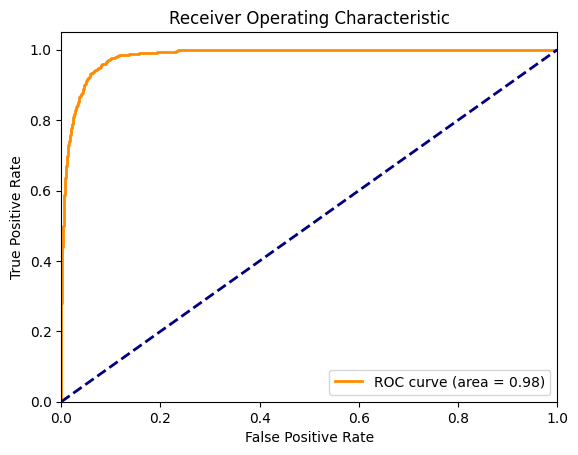

In [80]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### **Model Evaluation: Rank order & KS Statistic**

In [86]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})

df_eval.head()

,Default Truth,Default Probability
19205,0,0.516
15514,0,0.000
30367,0,0.006
35347,0,0.010
41814,1,0.940


In [87]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.516,8
15514,0,0.000,2
30367,0,0.006,6


In [88]:
df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-Events': x['Default Truth'].count() - x['Default Truth'].sum()

}))

df_grouped.reset_index(inplace=True)
df_grouped

<ipython-input-88-91a2285b2cdc>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-Events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.032,3.000,1247.000
7,7,0.032,0.217,14.000,1235.000
8,8,0.217,0.810,159.000,1091.000
9,9,0.810,1.000,898.000,352.000


In [93]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events'] + df_grouped['Non-Events'])
df_grouped['Non-Event Rate'] = df_grouped['Non-Events']*100 / (df_grouped['Events'] + df_grouped['Non-Events'])
df_grouped = df_grouped.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate
0,9,0.810,1.000,898.000,352.000,71.840,28.160
1,8,0.217,0.810,159.000,1091.000,12.720,87.280
2,7,0.032,0.217,14.000,1235.000,1.121,98.879
3,6,0.005,0.032,3.000,1247.000,0.240,99.760
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [94]:
df_grouped['Cum Events'] = df_grouped['Events'].cumsum()
df_grouped['Cum Non-Events'] = df_grouped['Non-Events'].cumsum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Cum Events,Cum Non-Events
0,9,0.810,1.000,898.000,352.000,71.840,28.160,898.000,352.000
1,8,0.217,0.810,159.000,1091.000,12.720,87.280,1057.000,1443.000
2,7,0.032,0.217,14.000,1235.000,1.121,98.879,1071.000,2678.000
3,6,0.005,0.032,3.000,1247.000,0.240,99.760,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [96]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-Event Rate'] = df_grouped['Cum Non-Events'] * 100 / df_grouped['Non-Events'].sum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Cum Events,Cum Non-Events,Cum Event Rate,Cum Non-Event Rate
0,9,0.810,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082
1,8,0.217,0.810,159.000,1091.000,12.720,87.280,1057.000,1443.000,98.417,12.632
2,7,0.032,0.217,14.000,1235.000,1.121,98.879,1071.000,2678.000,99.721,23.444
3,6,0.005,0.032,3.000,1247.000,0.240,99.760,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [97]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-Event Rate'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Cum Events,Cum Non-Events,Cum Event Rate,Cum Non-Event Rate,KS
0,9,0.810,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.217,0.810,159.000,1091.000,12.720,87.280,1057.000,1443.000,98.417,12.632,85.785
2,7,0.032,0.217,14.000,1235.000,1.121,98.879,1071.000,2678.000,99.721,23.444,76.277
3,6,0.005,0.032,3.000,1247.000,0.240,99.760,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


**Insight**: The highest KS value is 85.88%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)


In [100]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836369368800997
Gini Coefficient: 0.9672738737601994


**Insight**: AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

### **Finalizing the model and visualize feature importance**

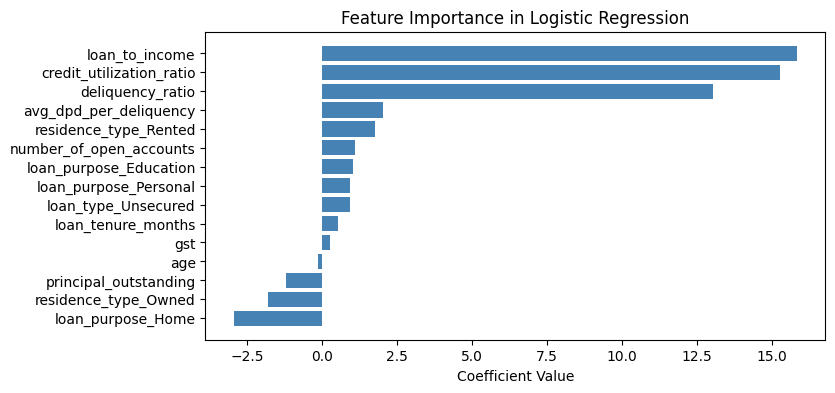

In [99]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

## **Saving the model**

In [101]:
X_test_encoded.head(3)

,age,gst,loan_tenure_months,principal_outstanding,number_of_open_accounts,credit_utilization_ratio,loan_to_income,deliquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.214,0.755,0.344,0.333,0.990,0.549,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.066,0.226,0.330,1.000,0.323,0.219,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.071,0.547,0.318,0.667,0.828,0.179,0.000,0.000,True,False,False,False,False,False


In [102]:
X_test_encoded.columns

Index(['age', 'gst', 'loan_tenure_months', 'principal_outstanding',
       'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income',
       'deliquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [103]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'deliquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [104]:
X_train_encoded.columns

Index(['age', 'gst', 'loan_tenure_months', 'principal_outstanding',
       'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income',
       'deliquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [106]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}

dump(model_data, 'model_data.joblib')

['model_data.joblib']

In [107]:
final_model.coef_, final_model.intercept_

(array([[-0.14361963,  0.26841273,  0.52969709, -1.19960379,  1.11154346,
         15.28226671, 15.85636069, 13.05954036,  2.03420678, -1.80569219,
          1.76170223,  1.02971814, -2.94969791,  0.92494415,  0.92494415]]),
 array([-19.37265287]))